<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>👋Predicting the final grade of a student</b></h1>
    <hr style = "height: 2px; color: black;">

The data used in this notebook is from a portugese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is a regression problem and we have to predict the final grade of a student from the given student information.

### [Link to dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)

### Citation:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h3 style="color: green;"><b>📈Importing relevant modules</b></h3>
    <hr style = "height: 2px; color: black;">

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gren = Style.BRIGHT + Fore.GREEN
blk = Style.BRIGHT + Fore.BLACK
res = Style.RESET_ALL

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [35]:
# Standard ML models for comparison
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import ElasticNet
# from sklearn.ensemble import RandomForestRegressor

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h3 style="color: green;"><b>Information about the dataset</b></h3>
    <hr style = "height: 2px; color: black;">

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']

In [130]:
# creating a pandas dataframe by the name of student
student = pd.read_csv('../input/student-mat.csv')

In [7]:
def load_data():
    # load student data from a csv file
    student = pd.read_csv('../input/student-mat.csv')
    return student.head(2)

In [8]:
load_data()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


In [14]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [10]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>💡About the DataSet</b></h1>
    <hr style = "height: 2px; color: black;">
  <ul>
    <li><b>Data Size</b>: The dataset contains 395 rows and 33 columns.</li>
    <li><b>Data Types</b>: The data contains features with data types int64, Object.</li>
    <li><b>Missing Values</b>: No column has missing values in the dataset, which is a great sign and simplifies the data cleaning process.</li>
    <li><b>Unique Values</b>: The number of unique values varies among features.</li>
    <li><b>Statistical Details</b>: The 'min', 'max', 'average', and 'standard deviation' values indicate the range and dispersion of data for each column, highlighting potential outliers or anomalies.</li>
    <li><b>Irrelevant Features</b>: All the Features seems important and useful for final evaluation.</li>
</ul>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h3 style="color: green;"><b>📈Exploratory Data Analysis</b></h3>
    <hr style = "height: 2px; color: black;">

In [9]:
def get_total_std():
    # printing the total number of students
    print("Total number of students", len(student))

In [10]:
def vertical_bar_plot(data, labels):
      """
      Generates a vertical bar plot.

      Args:
        data: A list of data values.
        labels: A list of labels for the data values.

      Returns:
        A matplotlib figure object.
      """

      fig = plt.figure()
      ax = fig.add_subplot(111)
      ax.bar(labels, data)
      ax.set_ylabel('Data Values')
      ax.set_xlabel('Labels')
      plt.show()

In [11]:
def horizontal_bar_plot(data, labels):
      """
      Generates a horizontal bar plot.

      Args:
        data: A list of data values.
        labels: A list of labels for the data values.

      Returns:
        A matplotlib figure object.
      """

      fig = plt.figure()
      ax = fig.add_subplot(111)
      ax.barh(data)
      ax.set_xlabel('Data Values')
      ax.set_ylabel('Labels')
      plt.show()


In [51]:
import matplotlib.pyplot as plt
import numpy as np

def pie_chart(data, labels):
    """
      Generates a pie chart.

      Args:
        data: A list of data values.
        labels: A list of labels for the data values.

      Returns:
        A matplotlib figure object.
    """

    plt.figure(figsize = (18,5))
    plt.subplot(1,2,1)
    data.value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = palette5, 
                                         )



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈Percentage of male and female</b></h4>
    <hr style = "height: 2px; color: black;">

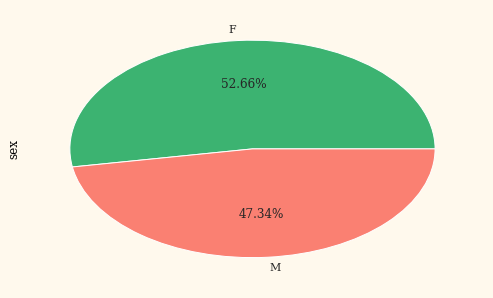

In [52]:
pie_chart(student['sex'],None)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Number of students scoring the G3 grade</b></h4>
    <hr style = "height: 2px; color: black;">

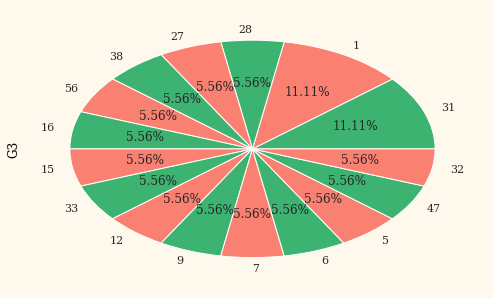

In [53]:
student_grades = student['G3'].value_counts().sort_values()
pie_chart(student_grades, None)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Grades according to the number of students who scored them</b></h4>
    <hr style = "height: 2px; color: black;">

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



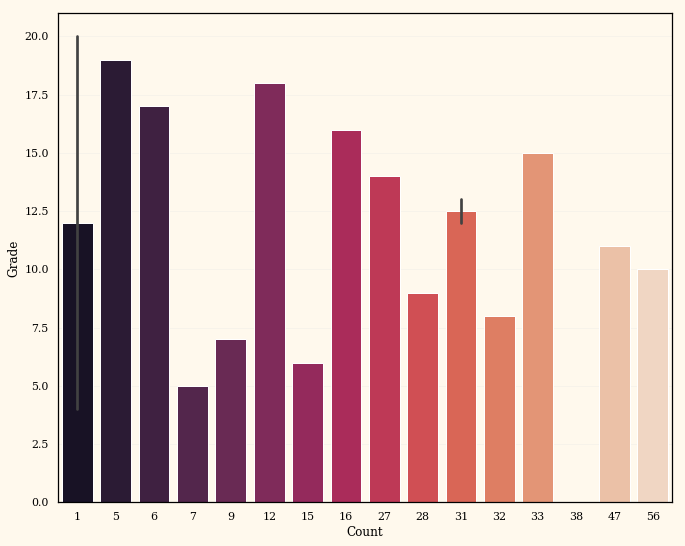

In [56]:
plt.figure(figsize = (11,9))
grade_counts = student['G3'].value_counts()
top_origin =grade_counts

temp = pd.DataFrame({
    'Grade': top_origin.index,
    'Count': top_origin.values
})


sns.barplot(x='Count', y='Grade', data=temp, palette = 'rocket')
# plt.xticks(rotation = 90)
del temp

In [58]:
student.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Distribution of students by age</b></h4>
    <hr style = "height: 2px; color: black;">



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



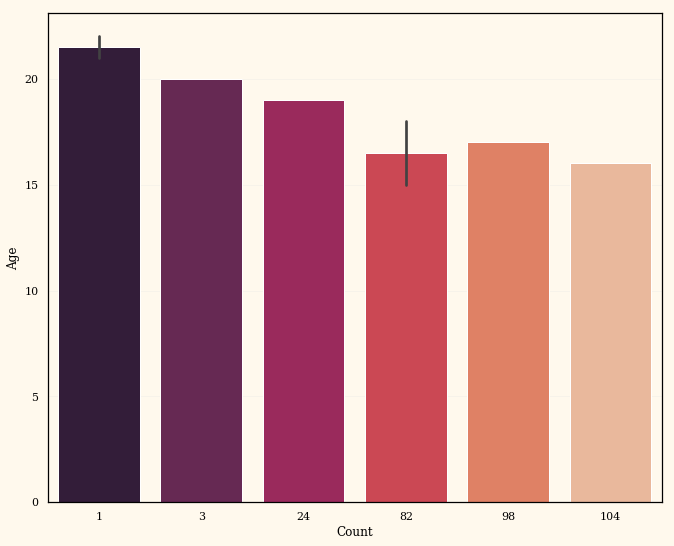

In [59]:
plt.figure(figsize = (11,9))
grade_counts = student['age'].value_counts()
top_origin =grade_counts

temp = pd.DataFrame({
    'Age': top_origin.index,
    'Count': top_origin.values
})


sns.barplot(x='Count', y='Age', data=temp, palette = 'rocket')
# plt.xticks(rotation = 90)
del temp

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Distribution of students in terms of gender by Age and study time</b></h4>
    <hr style = "height: 2px; color: black;">

In [63]:
student.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


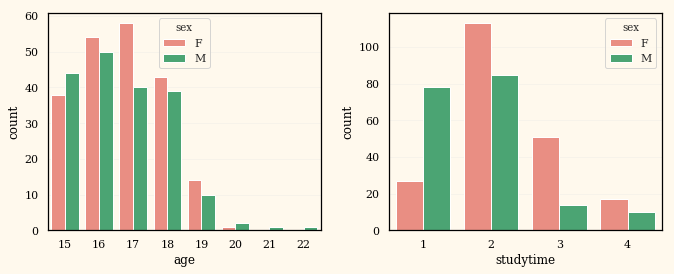

In [61]:
plt.figure(figsize = (11,4))
plt.subplot(121)
sns.countplot(data = student, x = 'age', hue = 'sex', palette = palette4)
plt.subplot(122)
sns.countplot(data = student, x = 'studytime', palette = palette4, hue = 'sex')
plt.subplots_adjust(wspace=0.25)

females study more than males and females aged 16 and over are greater in than male counterparts

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Distribution of students in terms of gender by Free time and Going out time</b></h4>
    <hr style = "height: 2px; color: black;">

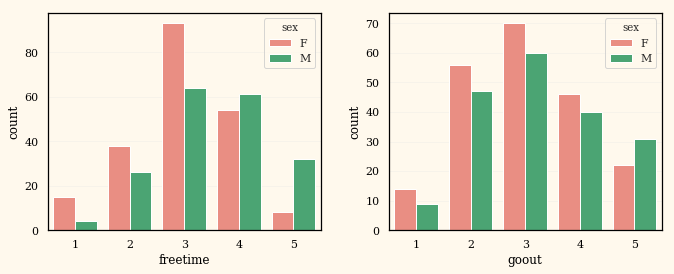

In [64]:
plt.figure(figsize = (11,4))
plt.subplot(121)
sns.countplot(data = student, x = 'freetime', hue = 'sex', palette = palette4)
plt.subplot(122)
sns.countplot(data = student, x = 'goout', palette = palette4, hue = 'sex')
plt.subplots_adjust(wspace=0.25)

Girls do spend free time but less than 3 hours. More boys spend free time, 3 hours or more.   Girls go out just more than boys in number. In conclusion, girls go out more and spend more free time outside than boys. people who are younger have a higher final grade than older people

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Does Gender affect the final grade ?</b></h4>
    <hr style = "height: 2px; color: black;">

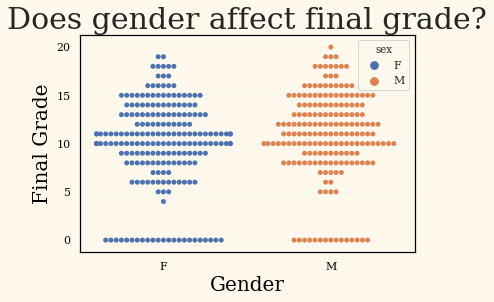

In [65]:
b = sns.swarmplot(x='sex', y='G3',hue='sex', data=student)
b.axes.set_title('Does gender affect final grade?', fontsize = 30)
b.set_xlabel('Gender', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

More female students failed at their final grade than male student. Boys performed better at 20 grade than female students.

In [66]:
student.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h4 style="color: green;"><b>📈 Does being from a Rural area have any relationship with studytime and freetime?</b></h4>
    <hr style = "height: 2px; color: black;">

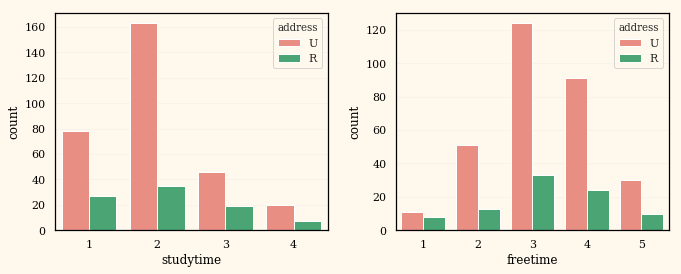

In [67]:
plt.figure(figsize = (11,4))
plt.subplot(121)
sns.countplot(data = student, x = 'studytime', hue = 'address', palette = palette4)
plt.subplot(122)
sns.countplot(data = student, x = 'freetime', palette = palette4, hue = 'address')
plt.subplots_adjust(wspace=0.25)

Students from Urban areas study more than rural students. Secondly students from urban areas also spend more free time than students from rural areas.

## Most students are from urban ares, but do urban students perform better than rurual students?

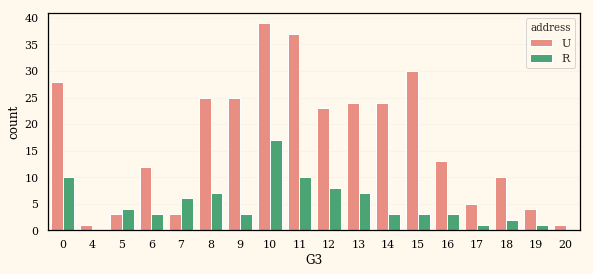

In [69]:
plt.figure(figsize = (21,4))
plt.subplot(121)
sns.countplot(data = student, x = 'G3', hue = 'address', palette = palette4)


Students in urban areas achieved better final grades compared to students from rural areas. There is a big difference between the number of students coming to study from rural and urban areas. A very small amount of students from rural areas achieved high final grades. 

The graph shows that on there is not much difference between the scores based on location.

## Other features

It might not be wise to analyse every feature so I will find the features most correlated to the final grade and spend more time on them.

## Correlation

Next we find the correlation between various features and the final grade.
 
### Note: This correlation is only between numeric values

In [70]:
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h2 style="color : green"><b>💡Insights of EDA</b></h2>
    <hr style = "height: 2px; color: black;">
    <ul>
        <li> Their are lot of features, we have to being selective and creative due to correlation of features and we can also create some new and more useful features</li>
        <li> The percentage of female students is greater than male students</li>
        <li> 11% percent of students (including both male and female) failed at their final grade G3</li>
        <li>Five students scored the highest among all the students in terms of the final grade.</li>
        <li>Students aged 20 or more are the highest in number</li>
        <li>Female students study more than male students and female students aged 16 and over are greater than their male counterparts.</li>
        <li>Girls do spend free time but less than 3 hours. A greater number of boys spend free time, 3 hours or higher.   Girls go out just more than boys in number. In conclusion, girls go out more and spend more free time outside than boys. </li>
        <li>People who are younger have a better final grade than older people</li>
        <li>A higher number of female students failed at their final grade than their male counterparts. Boys performed better in their final grade than female students.</li>
        <li>Students from Urban areas study more than their rural counterparts and they also socialize more than their rural counteprarts</li>
        <li>Students in urban areas achieved better final grades compared to students from rural areas.</li>
    </ul>
    </div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    <h1 style="color: green;"><b>🤖Model Training</b></h1>
    <hr style = "height: 2px; color: black;">

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [131]:
student.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [132]:
# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [133]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)

In [134]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(student, labels, test_size = 0.25, random_state=42)

In [136]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
16,16,4,4,1,3,0,3,2,3,1,2,2,6,14,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
66,15,4,4,1,4,0,1,3,3,5,5,3,4,12,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
211,17,4,4,1,2,0,5,3,5,4,5,3,13,13,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
19,16,4,3,1,1,0,3,1,3,1,3,5,4,10,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [137]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [138]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [139]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [140]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [141]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.41964,4.27556
ElasticNet Regression,3.62976,4.58258
Random Forest,3.04141,3.77213
Extra Trees,3.16222,4.03809
SVM,3.50899,4.38375
Gradient Boosted,3.19463,4.00246
Baseline,3.78788,4.82523


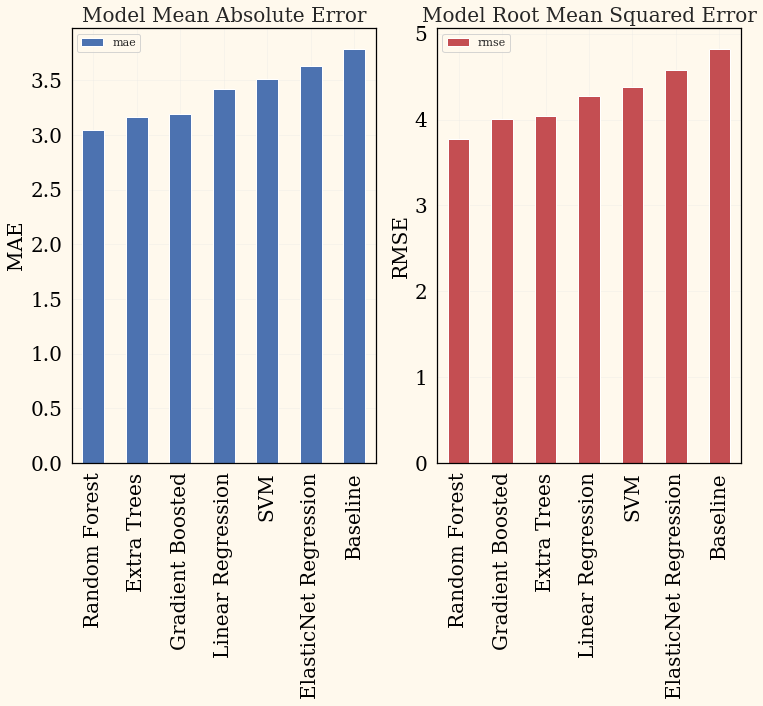

In [142]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()